<h1> Introdução

Esse desafio foi proposto no curso de estatística EBA. 
No conjunto de dados é composto por clientes da empresa Ifood, com dados sobre:

 


    - Perfis do cliente
    - Preferência do produto
    - Sucessos/fracassos da campanha
    - Desempenho do canal

Com esse dataset iremos realizar uma análise exploratória desses dados

<h2> Entendendo os clientes

Primeiramente, vamos explorar os dados que possuem nessa tabela. 
- Qual é o maior salário encontrado na base, demonstrado pela coluna 'Income' 
- Qual é a distribuição de salário
- Nossos clientes tem níveis de educação maiores ou menores? Demonstrado na coluna 'education_level'
- Quantos clientes temos em cada estado civil, demonstrado na coluna 'marital_status'

In [1]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#importando o documento
df = pd.read_csv("mkt_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [6]:
#Demonstrar o documento 
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [7]:
#Para verificar se temos células vazias
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [8]:
#A média, mediana 25 percentil, 75 percentil, mínimo e máximo das colunas 'income', 'kids' , 'expenses'

df[["kids", "Income", "expenses"]].describe()


,kids,Income,expenses
count,2205.000000,2205.000000,2205.000000
mean,0.948753,51622.094785,562.764626
std,0.749231,20713.063826,575.936911
min,0.000000,1730.000000,4.000000
25%,0.000000,35196.000000,56.000000
50%,1.000000,51287.000000,343.000000
75%,1.000000,68281.000000,964.000000
max,3.000000,113734.000000,2491.000000


O maior salário demonstrado na tabela acima é de 113.734, e o salário mínimo é de 1.730, vamos analisar melhor a distribuição dos salários 

<Axes: >

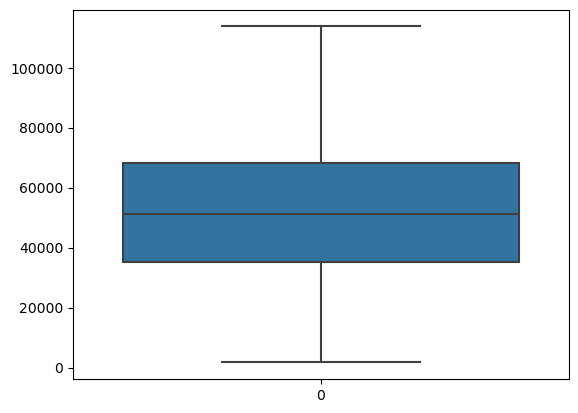

In [11]:
#Abaixo o boxplot para análise
sns.boxplot(df['Income'])

In [13]:
#Calculando desvio
desvio = df['Income'].std()/df['Income'].mean()
desvio

0.4012441554786958

In [14]:
#Calculando a variância da tabela
df['Income'].skew()

0.013164263414417078

Com as informações acima, é possível identificar que os salários dos clientes estão bem distribuidos, se aproximando de uma curva normal de variância. 

Análise dos níveis de educação dos clientes

<Axes: xlabel='education_level', ylabel='count'>

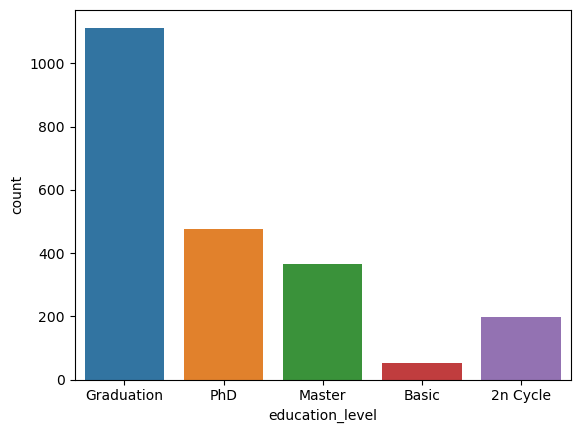

In [15]:
sns.countplot(x=df["education_level"])

Grande maioria da base possui graduação. 

Análise do estado civil dos clientes

<Axes: xlabel='marital_status', ylabel='count'>

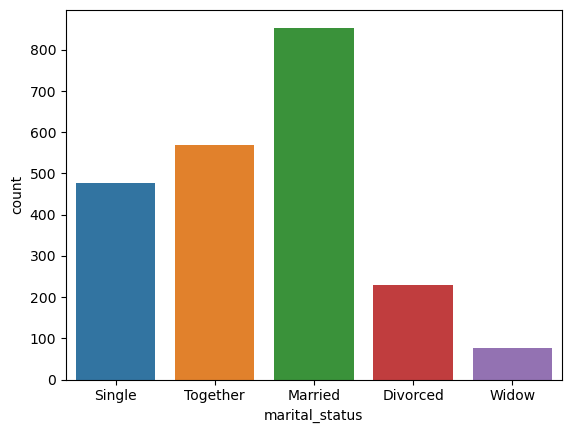

In [17]:
sns.countplot(x=df["marital_status"])

A maioria dos clientes são casados.

<h2> Hipóteses

- Será que as pessoas casadas tem mais filhos - filhos está na coluna 'kids'
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos - ver nas colunas 'expenses' 
- Pessoas que tem mais salários gastam mais 'expenses'

In [19]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


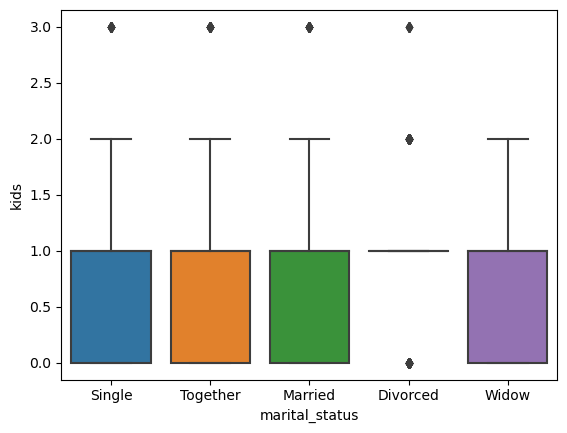

In [23]:
fig = sns.boxplot(x="marital_status", y= "kids", data = df)


Olhando o gráfico acima os números estão próximos, independente do estado civil, mas como a média de solteiros está um pouco menor, é possível deduzir que pessoas solteiras tem menos filhos, em relação as demais categorias

<Axes: xlabel='kids', ylabel='expenses'>

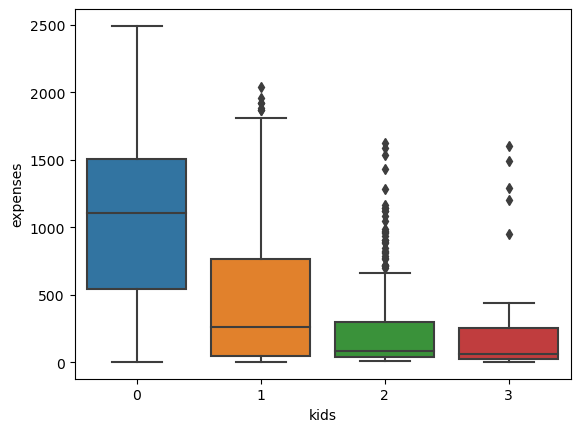

In [3]:
#Análise para pessoas com crianças gastam mais ou menos na plataforma

sns.boxplot(x='kids', y= 'expenses', data=df)

In [6]:
df.groupby("kids")["expenses"].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,1041.207006,625.734894,5.0,546.00,1106.5,1505.50,2491.0
1,1112.0,434.530576,452.606603,4.0,50.00,264.0,762.25,2036.0
2,415.0,221.568675,290.259678,8.0,39.00,84.0,296.50,1627.0
3,50.0,237.380000,390.174157,6.0,28.25,62.0,254.00,1601.0


In [7]:
df.groupby("kids")["expenses"].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

Possível identificar no gráfico acima, que quanto mais a família possui crianças menos elas gastam, mas há presença de outliers, sobretudo quando há um filho. Mas apesar disso,  é possível visualizar a queda de gastos quando há uma criança na família.

<Axes: xlabel='expenses', ylabel='Income'>

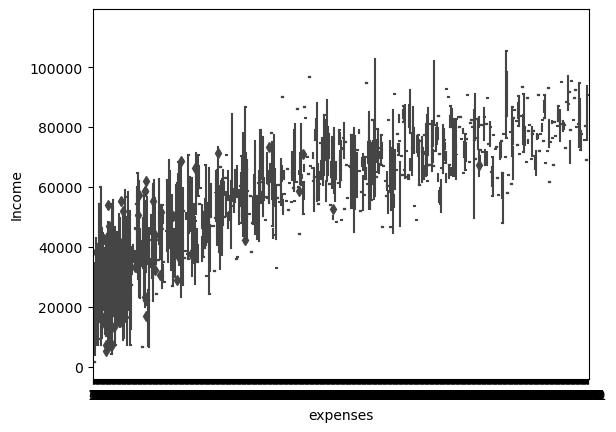

In [8]:
#Análise se pessoas que recebem mais gastam mais 
sns.boxplot(x="expenses", y= "Income", data = df)

Não foi uma escolha colocar o boxplot, então vou aplicar outra visualização:


<Axes: xlabel='expenses', ylabel='Income'>

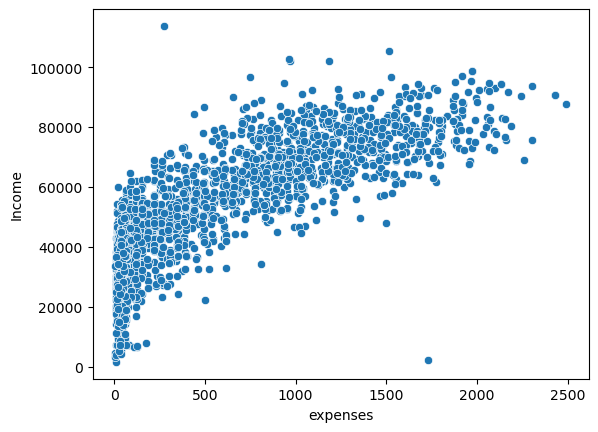

In [9]:
sns.scatterplot(x="expenses", y="Income", data = df)

É possível identificar no gráfico uma linha de crescimento de quanto maior a remuneração da pessoa, demonstrado no eixo "y" mais ela gasta na plataforma, demonstrado no eixo "x", logo a relação é diretamente proporcional entre o valor que a pessoa ganha versus os gastos na plataforma

<Axes: xlabel='kids', ylabel='Income'>

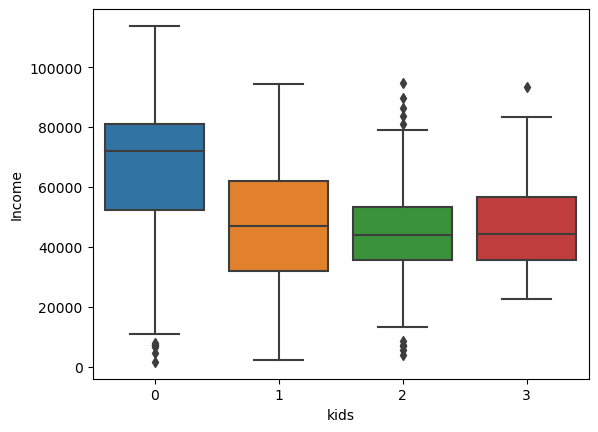

In [14]:
#Analisar se há clientes com altos salários e com filhos
sns.boxplot(x="kids", y= "Income", data = df)

In [15]:
df.groupby("kids")["Income"].median()

kids
0    72082.5
1    47068.0
2    44051.0
3    44277.0
Name: Income, dtype: float64

In [16]:
df.groupby("kids")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,65094.417197,22558.308456,1730.0,52526.50,72082.5,81045.75,113734.0
1,1112.0,46957.959532,18207.545290,2447.0,31990.25,47068.0,61880.25,94472.0
2,415.0,44328.491566,14344.395061,4023.0,35572.50,44051.0,53306.00,94871.0
3,50.0,46677.000000,15350.343167,22574.0,35688.00,44277.0,56782.25,93404.0


Com os dados demonstrados acima, seria interessante o aplicativo da Ifood, realizar alguma campanha de marketing para atrair pessoas que possuam filhos, como por exemplo: cupom família, em que a precificação seja atratativa para o pessoal de negócio, a fim de trazer mais clientes para a plataforma. 